In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [2]:
path="/home/brijesh/Documents/myUNT/Feature Engg/project-mask/CMFD/00000/"

In [3]:
#load an image
def img_load(img):
    img=cv2.imread(path+img+".jpg")
    return img

In [4]:
#Harris corner detection
def corner_det(img):
    img=img_load(img)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    dst = cv2.cornerHarris(gray,2,3,0.04)
    #result is dilated for marking the corners, not important
    dst = cv2.dilate(dst,None)
    # Threshold for an optimal value, it may vary depending on the image.
    img[dst>0.01*dst.max()]=[0,0,255]

#    cv2.imshow('dst',img)
#    if cv2.waitKey(0) & 0xff == 27:
#       cv2.destroyAllWindows()
    return dst

In [5]:
corner_det("00000_Mask")

array([[2.8417969e+01, 2.8417969e+01, 2.8417969e+01, ..., 1.9164063e-01,
        1.9164063e-01, 5.3750001e-02],
       [3.8113632e+01, 4.0483437e+01, 4.3820312e+01, ..., 1.9164063e-01,
        1.9164063e-01, 5.3750001e-02],
       [3.8113632e+01, 4.0483437e+01, 4.3820312e+01, ..., 3.1429687e-01,
        1.9164063e-01, 1.6117188e-01],
       ...,
       [5.3386326e+00, 5.3386326e+00, 5.3386326e+00, ..., 5.1723596e+02,
        2.9726312e+02, 9.8343750e+01],
       [4.5967188e+00, 4.5967188e+00, 4.5967188e+00, ..., 5.1723596e+02,
        2.9726312e+02, 9.8343750e+01],
       [2.3359375e+00, 2.3359375e+00, 2.3359375e+00, ..., 2.9726312e+02,
        2.9726312e+02, 9.2911133e+01]], dtype=float32)

In [7]:
#Sobel edge detection
def edge_det(img):
    img=img_load(img)
    # Convert to graycsale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Blur the image for better edge detection
    img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)


    # Sobel Edge Detection

    sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis

    sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis

    sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
    
    return sobelxy
    # Display Sobel Edge Detection Images

#    cv2.imshow('Sobel X', sobelx)
#    cv2.waitKey(0)

#    cv2.imshow('Sobel Y', sobely)
#    cv2.waitKey(0)

#   cv2.imshow('Sobel X Y using Sobel() function', sobelxy)
#cv2.waitKey(0)


In [8]:
edge_det("00000_Mask")

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   5.,  11., ...,  -2.,  -6.,   0.],
       [  0.,  -1.,  11., ...,   2.,  -7.,   0.],
       ...,
       [  0.,   9.,   0., ..., -33., -25.,   0.],
       [  0.,   8.,   3., ..., -36., -34.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [9]:
# Canny edge detection
def canny(img):
    img=img_load(img)
    # Convert to graycsale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Blur the image for better edge detection
    img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)

    edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200)
    
    # Display Canny Edge Detection Image
    #cv2.imshow('Canny Edge Detection', edges)
    plt.imshow(edges)
    #cv2.waitKey(0)
    return edges
    

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

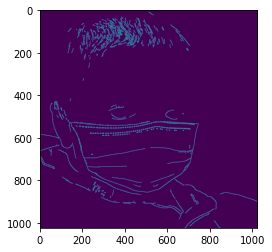

In [10]:
canny("00000_Mask")

In [11]:
# FAST feature detector
def fast_det(img):
    img = img=img_load(img)
    # Initiate FAST object with default values
    fast = cv2.FastFeatureDetector_create()
    # find and draw the keypoints
    kp = fast.detect(img,None)
    img2 = cv2.drawKeypoints(img, kp, None, color=(255,0,0))
    # Print all default params
    print( "Threshold: {}".format(fast.getThreshold()) )
    print( "nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
    print( "neighborhood: {}".format(fast.getType()) )
    print( "Total Keypoints with nonmaxSuppression: {}".format(len(kp)) )
    #cv.imwrite('fast_true.png', img2)
    # Disable nonmaxSuppression
    fast.setNonmaxSuppression(0)
    kp = fast.detect(img, None)
    print( "Total Keypoints without nonmaxSuppression: {}".format(len(kp)) )
    img3 = cv2.drawKeypoints(img, kp, None, color=(255,0,0))
    #cv2.imshow('fast_false', img3)
    return kp

In [12]:
fast_det("00000_Mask")

Threshold: 10
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 11478
Total Keypoints without nonmaxSuppression: 34243


[<KeyPoint 0x7fb8f6eb7f60>,
 <KeyPoint 0x7fb8f6eb7fc0>,
 <KeyPoint 0x7fb8f6eb7f90>,
 <KeyPoint 0x7fb8f6eb7f30>,
 <KeyPoint 0x7fb94ffe9cf0>,
 <KeyPoint 0x7fb8f6eb8270>,
 <KeyPoint 0x7fb8f6eb8210>,
 <KeyPoint 0x7fb8f6eb8240>,
 <KeyPoint 0x7fb8f6eb82a0>,
 <KeyPoint 0x7fb8f6eb81b0>,
 <KeyPoint 0x7fb8f6eb81e0>,
 <KeyPoint 0x7fb8f6eb8150>,
 <KeyPoint 0x7fb8f6eb8180>,
 <KeyPoint 0x7fb8f6eb80f0>,
 <KeyPoint 0x7fb8f6eb8120>,
 <KeyPoint 0x7fb8f6eb8090>,
 <KeyPoint 0x7fb8f6eb80c0>,
 <KeyPoint 0x7fb8f6eb8030>,
 <KeyPoint 0x7fb8f6eb8060>,
 <KeyPoint 0x7fb8f6eb82d0>,
 <KeyPoint 0x7fb8f6eb8300>,
 <KeyPoint 0x7fb8f6eb8330>,
 <KeyPoint 0x7fb8f6eb8360>,
 <KeyPoint 0x7fb8f6eb8390>,
 <KeyPoint 0x7fb8f6eb83c0>,
 <KeyPoint 0x7fb8f6eb83f0>,
 <KeyPoint 0x7fb8f6eb8420>,
 <KeyPoint 0x7fb8f6eb8450>,
 <KeyPoint 0x7fb8f6eb8480>,
 <KeyPoint 0x7fb8f6eb84b0>,
 <KeyPoint 0x7fb8f6eb84e0>,
 <KeyPoint 0x7fb8f6eb8510>,
 <KeyPoint 0x7fb8f6eb8540>,
 <KeyPoint 0x7fb8f6eb8570>,
 <KeyPoint 0x7fb8f6eb85a0>,
 <KeyPoint 0x7fb8f6e

In [13]:
# Laplacian of Gaussian-Blob detection
def LoG_det(img):
    # Load the image in greyscale
    img=img_load(img)
    # Convert to graycsale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur
    blur = cv2.GaussianBlur(img,(3,3),0)

    # Apply Laplacian operator in some higher datatype
    laplacian = cv2.Laplacian(blur,cv2.CV_64F)

    # But this tends to localize the edge towards the brighter side.
    laplacian1 = laplacian/laplacian.max()
    return laplacian1
    #cv2.imshow('a7',laplacian1)
    #cv2.waitKey(0)

In [14]:
LoG_det("00000_Mask")

array([[[ 0.        , -0.02857143,  0.        ],
        [-0.02142857, -0.01428571, -0.01428571],
        [-0.01428571, -0.01428571, -0.03571429],
        ...,
        [ 0.        ,  0.        ,  0.        ],
        [ 0.00714286,  0.00714286,  0.        ],
        [-0.02857143, -0.02857143,  0.        ]],

       [[ 0.01428571,  0.01428571,  0.01428571],
        [ 0.        , -0.00714286,  0.        ],
        [-0.02857143, -0.04285714, -0.01428571],
        ...,
        [ 0.01428571,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ]],

       [[ 0.02142857,  0.02857143,  0.02142857],
        [ 0.00714286,  0.00714286,  0.        ],
        [-0.00714286, -0.02142857, -0.02142857],
        ...,
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        , -0.01428571,  0.        ],
        [ 0.02857143,  0.02142857,  0.        ]],

       ...,

       [[-0.01428571, -0.01428571, -0.02857143],
        [ 0